# Linear Regression Project

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 

In [12]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [3]:
customers = pd.read_csv("C:/Users/kevin/OneDrive/Upskill_Puthon_DS/Github_oneDrive/My_Machine_Learning_Notebooks/Linear_Regression/Ecommerce Customers")

In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

** Compare Time on Website and Yearly Amount Spent.**

Text(0.1, 0.9, 'pearsonr  = -0.003, p = 0.95')

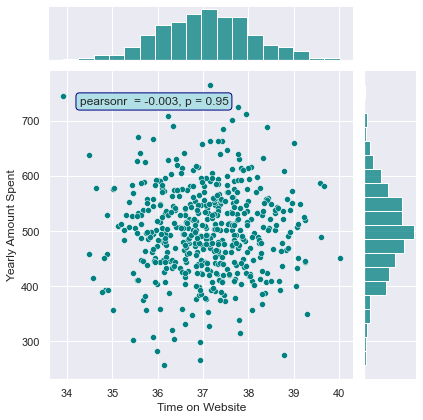

In [39]:
sns.set(style="darkgrid", color_codes=True)
g = sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent', data = customers, color='teal')

x = customers['Time on Website']
y = customers['Yearly Amount Spent']

r, p = stats.pearsonr(x, y)
g.ax_joint.annotate('pearsonr 'f' = {r:.3f}, p = {p:.2f}',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})

** Compare Time on App and Yearly Amount Spent.**

Text(0.1, 0.9, 'pearsonr  = 0.499, p = 6.9e-33')

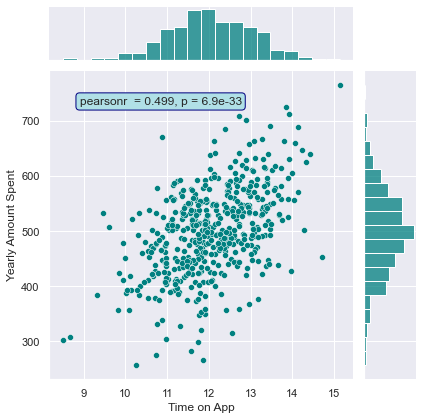

In [36]:
sns.set(style="darkgrid", color_codes=True)
g = sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data = customers, color='teal')

x = customers['Time on App']
y = customers['Yearly Amount Spent']

r, p = stats.pearsonr(x, y)
g.ax_joint.annotate('pearsonr 'f' = {r:.3f}, p = {p:.1e}',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})

** Compare Time on App and Length of Membership.**

Text(0.1, 0.9, 'pearsonr  = 0.029, p = 0.5')

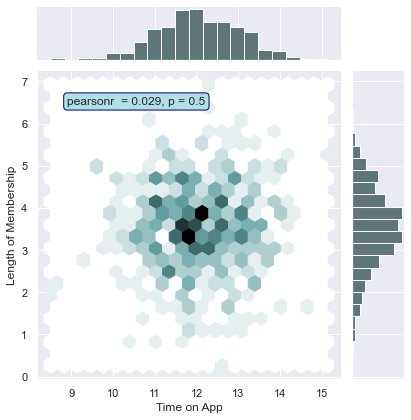

In [42]:
sns.set(style="darkgrid", color_codes=True)
g = sns.jointplot(x = 'Time on App', y = 'Length of Membership', data = customers, kind='hex', color='darkslategrey')

x = customers['Time on App']
y = customers['Length of Membership']

r, p = stats.pearsonr(x, y)
g.ax_joint.annotate('pearsonr 'f' = {r:.3f}, p = {p:.1f}',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})